In [14]:
import pandas as pd
import numpy as np
import os
os.environ['PROJ_LIB'] = '/data/keeling/a/sshu3/anaconda2/share/proj'
import matplotlib.pyplot as plt
import C14preproc as prep
import C14utils
from mpl_toolkits.basemap import Basemap, cm
from netCDF4 import Dataset
from scipy.interpolate import interp1d
import auxiliary_lib as au
import isamcalc_lib as isam
import socplot_lib as socplt

In [15]:
#================================================================================
# Plot the results of calibration + sensitivity range for D14C in 1 figure
# Since the sensitivity range is not matching the obs data well, we here don't
# want to show the shaded area for the paper
#================================================================================
# obs
obs_fname = 'Non_peat_data_permafrost.csv'
data = pd.read_csv(obs_fname,encoding='iso-8859-1',index_col='ProfileID', skiprows=[1])
all_profid = data.index.unique()
lons = prep.getvarxls(data,'Lon',all_profid[0:16],0)
lats = prep.getvarxls(data,'Lat',all_profid[0:16],0)

# Calibration
isam_cal_d14c_fname = 'isam_dc14_cali.dat'
isam_cal_soc_fname = 'isam_soc_cali.dat'

# Sensitivity test
#isam_sen43_d14c_fname = 'isam_dc14_43sen.dat'
#isam_sen43_soc_fname = 'isam_soc_43sen.dat'
#isam_sen110_d14c_fname = 'isam_dc14_110sen.dat'
#isam_sen110_soc_fname = 'isam_soc_110sen.dat'
#isam_sen143_d14c_fname = 'isam_dc14_143sen.dat'
#isam_sen143_soc_fname = 'isam_soc_143sen.dat'
#isam_sen146_d14c_fname = 'isam_dc14_146sen.dat'
#isam_sen146_soc_fname = 'isam_soc_146sen.dat'
#isam_sen197_d14c_fname = 'isam_dc14_197sen.dat'
#isam_sen197_soc_fname = 'isam_soc_197sen.dat'

# Um's results
isam_um_d14c_fname = 'isam_um_dc14.dat'
isam_um_soc_fname = 'isam_um_soc.dat'

# Create site dict
site = {
    "43" : 0,
    "110" : 1,
    "143" : 2,
    "197" : 3,
    "146" : 4,
    
}
site_cal = {
    "43" : 0,
    "110" : 1,
    "143" : 2,
}
site_eval = {
    "197" : 0,
    "146" : 1,    
}

yr_dict = {
    "43"  : 2001,
    "110" : 2005,
    "143" : 2007,
    "197" : 1999,
    "146" : 2002,   
}


/data/keeling/a/sshu3/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: FutureWarning: read_table is deprecated, use read_csv instead.
  after removing the cwd from sys.path.
/data/keeling/a/sshu3/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:11: FutureWarning: read_table is deprecated, use read_csv instead.
  # This is added back by InteractiveShellApp.init_path()
/data/keeling/a/sshu3/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:21: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
/data/keeling/a/sshu3/anaconda2/lib/python2.7/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/data/keeling/a/sshu3/anaconda2/lib/python2.7/site-package

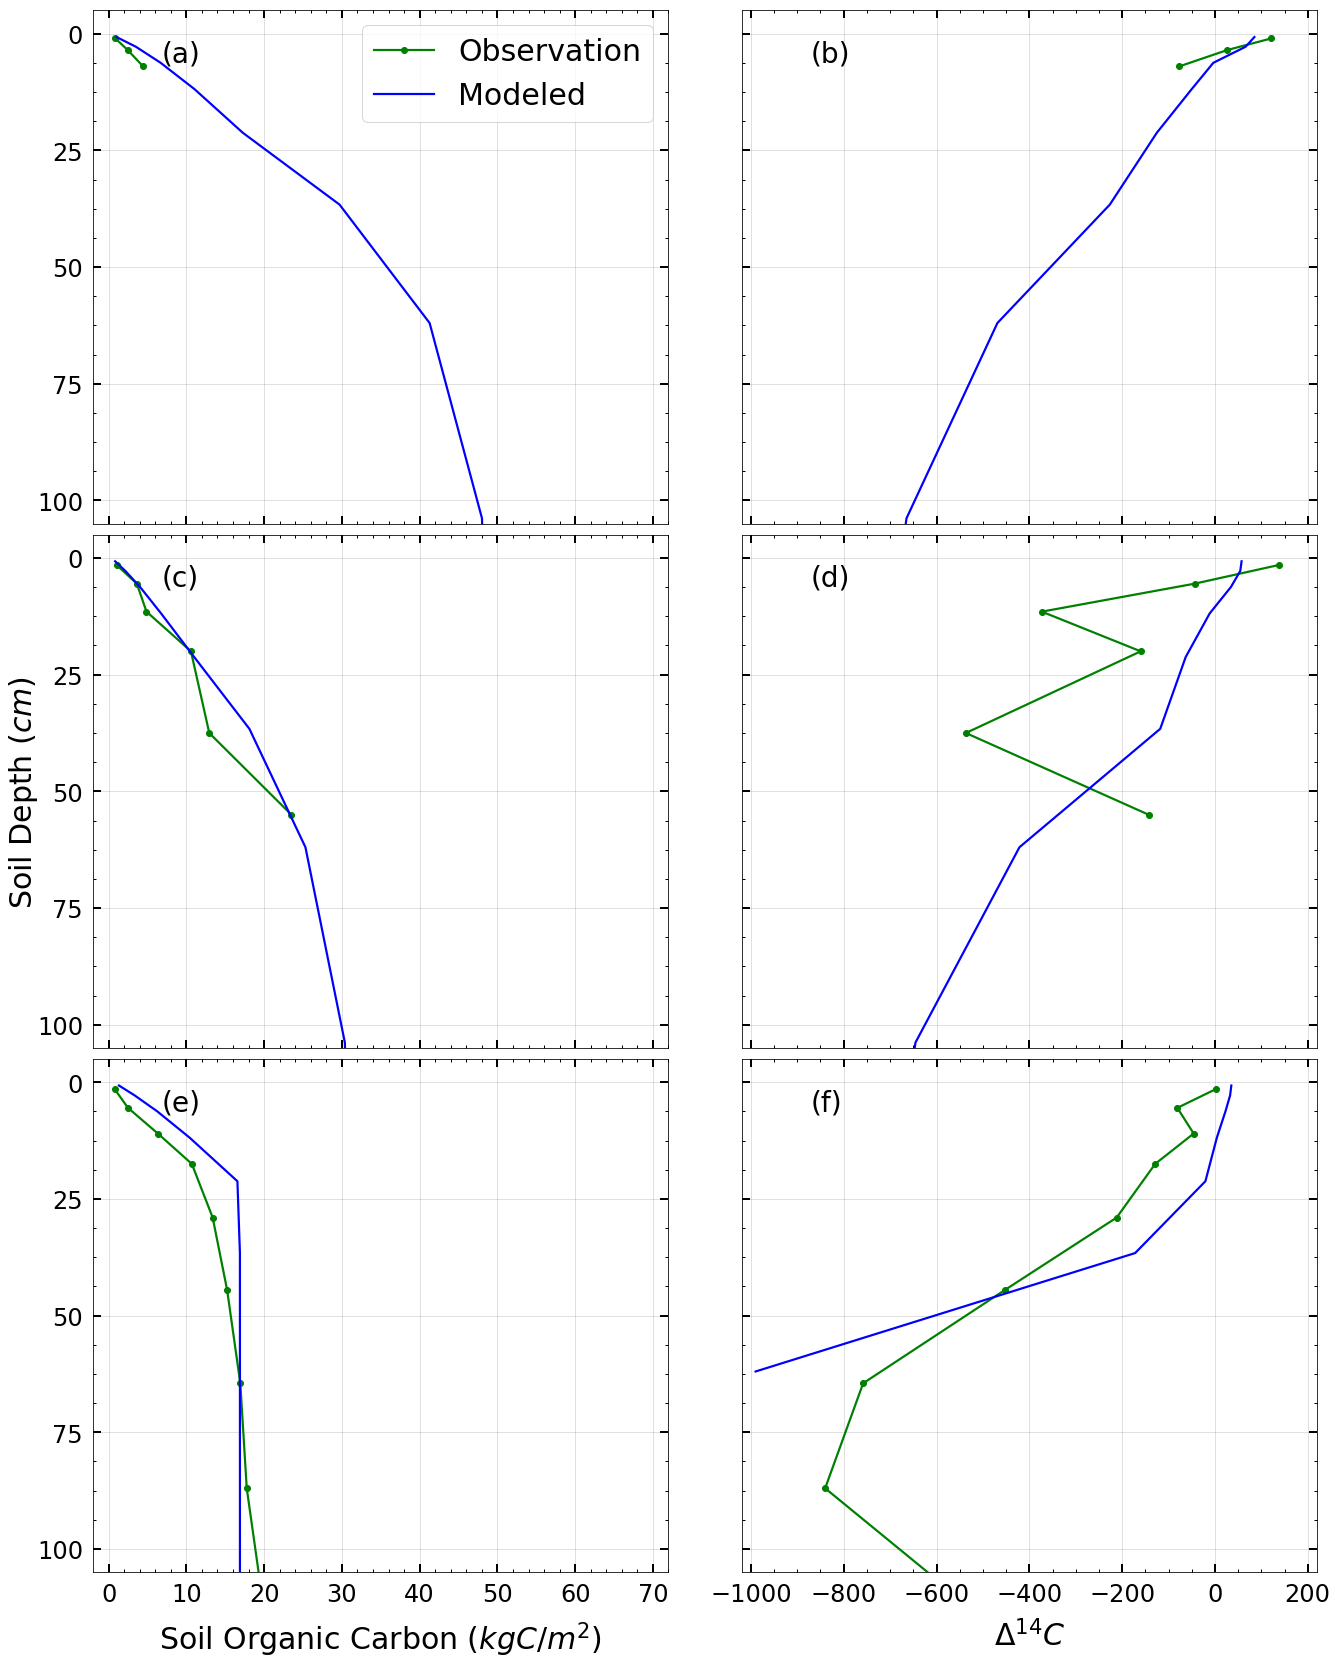

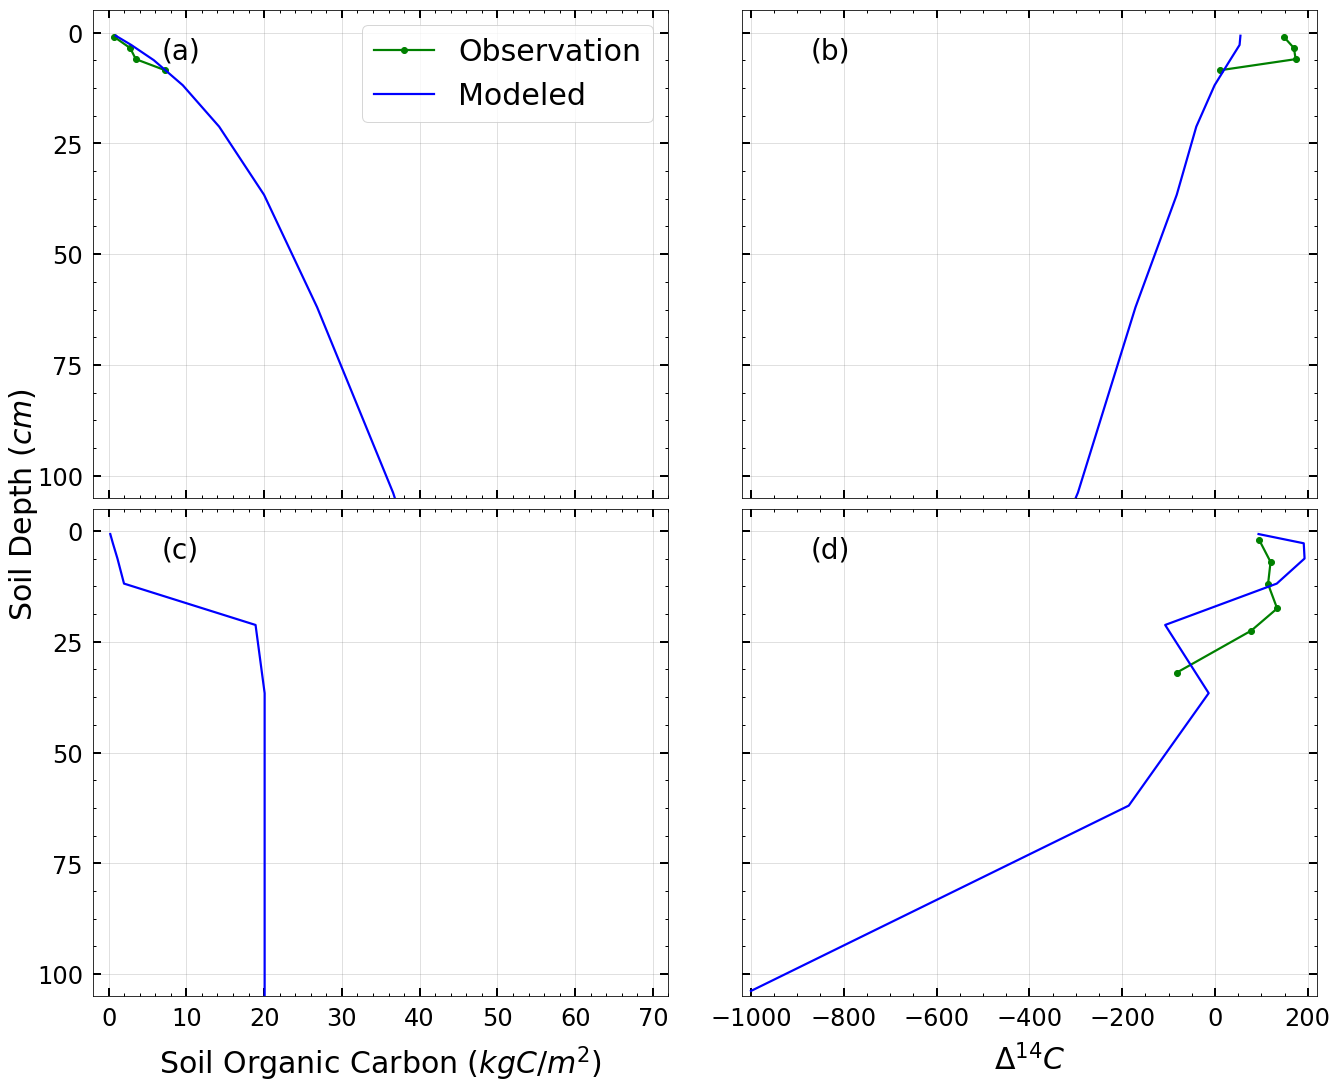

In [3]:
## DO NOT EDIT BELOW
# SOC
# Read in the calibrated site outputs
soccm = pd.read_table(isam_cal_soc_fname, header=None, delimiter=r"\s+")
soccm.columns = ['ID', 'Layer1', 'Layer2', 'Layer3', 'Layer4', 'Layer5', 'Layer6', 'Layer7', 'Layer8', 'Layer9', 'Layer10']
soccm = soccm.set_index('ID')
mod_profid = soccm.index

# D14C
# Read in the calibrated site outputs
d14cm = pd.read_table(isam_cal_d14c_fname, header=None, delimiter=r"\s+")
d14cm.columns = ['ID', 'Layer1', 'Layer2', 'Layer3', 'Layer4', 'Layer5', 'Layer6', 'Layer7', 'Layer8', 'Layer9', 'Layer10']
d14cm = d14cm.set_index('ID')
mod_profid = d14cm.index

# Get the corresponding SOC comparable against ISAM
z, dz, zsoih = isam.get_isam_soildp(10)
zsoih = zsoih * 100

# Extract corresponding measurements for each site and make figure
data.nodedepth = data.Layer_top + (data.Layer_bottom - data.Layer_top)/2.
myarray = [43, 110, 143, 146, 197]
figpos_array_cal = np.arange(321,327)
figpos_array_eval = np.arange(221,225)
substring_cal = ["(a)", "(b)", "(c)", "(d)", "(e)", "(f)"]
substring_eval = ["(a)", "(b)", "(c)", "(d)"]

fig = plt.figure(figsize=(20,24))
# Set the big subplot
ax = fig.add_subplot(111)
# Turn off axis lines and ticks of the big subplot
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelcolor='w', top='off', bottom='off', left='off', right='off')
# Add the axis label
plt.ylabel('Soil Depth ($cm$)', fontsize=30, labelpad=30)

# Set the big subplot
ax = fig.add_subplot(121)
# Turn off axis lines and ticks of the big subplot
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelcolor='w', top='off', bottom='off', left='off', right='off')
# Add the axis label
plt.xlabel('Soil Organic Carbon ($kgC/m^{2}$)', fontsize=30, labelpad=30)

# Set the big subplot
ax = fig.add_subplot(122)
# Turn off axis lines and ticks of the big subplot
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelcolor='w', top='off', bottom='off', left='off', right='off')
# Add the axis label
plt.xlabel('$\Delta ^{14}C$', fontsize=30, labelpad=30)

data.nodedepth = data.Layer_top + (data.Layer_bottom - data.Layer_top)/2.
# Subplots for calibration (3x2)
for siteid, ind in site_cal.items():
    # SOC
    # Observation
    dn = data.nodedepth.loc[int(float(siteid))].as_matrix()
    dp = (data.Layer_bottom.loc[int(float(siteid))] - data.Layer_top.loc[int(float(siteid))]).as_matrix()
    num_obs = data.C_Density[int(float(siteid))].__len__()
    sitesoc = data.C_Density.loc[int(float(siteid))].as_matrix()
    # Correction for the site Old black spruce (146) to keep consistent to D14C data
    #if(siteid == "146"):
    #    sitesoc[0] = 0.
    #    sitesoc[5] = float("nan")
    #    sitesoc[6] = float("nan")
    # Get SOC density
    socden = sitesoc * 1000.    
    # Get accumulated SOC
    accsoc = data.C_Density[int(float(siteid))].as_matrix() * float('nan')
    accsoc[0] = sitesoc[0] * 1000. * dp[0] / 100.
    accsoc[-1] = float('nan')
    for j in range(1,num_obs):
        accsoc[j] = accsoc[j-1] + sitesoc[j] * 1000. * dp[j] / 100.
        
    # Model results
    modsoc = soccm.loc[int(float(siteid))].as_matrix()
    # Get SOC density, not a good idea to show SOC density.
    modsocden = soccm.loc[int(float(siteid))].as_matrix()/dz
    for j in range(1,10):
        if(modsoc[j]>=0.):
            modsoc[j] = modsoc[j-1] + modsoc[j]
        else:
            modsoc[j] = float("nan")

    # Make plot
    Xobs = accsoc   # Accumulated SOC kgCm-2
    #Xobs = socden   # SOC profile kgCm-3
    Yobs = dn       # 1cm to 200cm
    Xmod = modsoc   # Accumulated SOC kgCm-2
    #Xmod = modsocden   # SOC profile kgCm-3
    Ymod = z*100.     # 1cm to 200cm
    
    #if (data.Site[int(float(siteid))].__class__.__name__ == 'Series'):
    #    tit = data.Site[int(float(siteid))].unique().astype('string')[0]
    #else:
    #    tit = data.Site[int(float(siteid))].encode('ascii','ignore')
    xlim = (-2, 72)
    ylim = (-5, 105)
    xticks = (0, 10, 20, 30, 40, 50, 60, 70)
    yticks = (0, 25, 50, 75, 100)
    if(ind == 0 or ind == 1):
        kwargs = {'fig': fig, 'figpos': figpos_array_cal[(ind*2)],'obs': Xobs, 'Yobs': Yobs, 'mod': Xmod, 'Ymod': Ymod, \
                  'xticks': xticks, 'hide_xticks': True, 'yticks': yticks, 'hide_yticks': False, 'sub': substring_cal[(ind*2)],\
                  'xlim': xlim, 'ylim': ylim, 'legendps': 'upper right'}
    if(ind == 2):
        kwargs = {'fig': fig, 'figpos': figpos_array_cal[(ind*2)],'obs': Xobs, 'Yobs': Yobs, 'mod': Xmod, 'Ymod': Ymod, \
                  'xticks': xticks, 'hide_xticks': False, 'yticks': yticks, 'hide_yticks': False, 'sub': substring_cal[(ind*2)], \
                  'xlim': xlim, 'ylim': ylim, 'legendps': 'upper right'}
    # Figure without sensitivity results added as shaded area
    status = socplt.plot_obsvsmod_plain(**kwargs)
    
    # D14C
    d14co = data.D14C_BulkLayer.loc[int(float(siteid))]
    nd = data.nodedepth.loc[int(float(siteid))]
    if(d14co.__class__.__name__ == 'float64'):
        Xobs = d14co   # SOC profile kgCm-3
        Yobs = nd      # 1cm to 200cm
    else:
        Xobs = d14co.as_matrix()   # SOC profile kgCm-3
        Yobs = nd.as_matrix()     # 1cm to 200cm
    Xmod = d14cm.loc[int(float(siteid))].as_matrix()   # SOC profile kgCm-3
    Xmod[Xmod < -999.99] = float("nan")
    Ymod = z*100.     # 1cm to 200cm
    #Xmod[Xmod<-999.] = float("nan")
    #Xobs[np.isnan(Xmod)] = float("nan")
    if (data.Site[int(float(siteid))].__class__.__name__ == 'Series'):
        tit = data.Site[int(float(siteid))].unique().astype('string')[0]
    else:
        tit = data.Site[int(float(siteid))].encode('ascii','ignore')
    
    xlim = (-1020, 220)
    ylim = (-5, 105)
    xticks = (-1000, -800, -600, -400, -200, 0, 200)
    yticks = (0, 25, 50, 75, 100)
    if(ind == 0 or ind == 1):
        kwargs = {'fig': fig, 'figpos': figpos_array_cal[(ind*2+1)], 'obs': Xobs, 'Yobs': Yobs, 'mod': Xmod, 'Ymod': Ymod, \
                  'xticks': xticks, 'hide_xticks': True, 'yticks': yticks, 'hide_yticks': True, 'sub': substring_cal[(ind*2+1)], \
                  'xlim': xlim, 'ylim': ylim, 'legendps': 'upper right'}
    if(ind == 2):
        kwargs = {'fig': fig, 'figpos': figpos_array_cal[(ind*2+1)], 'obs': Xobs, 'Yobs': Yobs, 'mod': Xmod, 'Ymod': Ymod, \
                  'xticks': xticks, 'hide_xticks': False, 'yticks': yticks, 'hide_yticks': True, 'sub': substring_cal[(ind*2+1)], \
                  'xlim': xlim, 'ylim': ylim, 'legendps': 'upper right'}
    status = socplt.plot_obsvsmod_plain(**kwargs)

#plt.show()
plt.savefig('figures/fig3/fig3_calibration.png')
#status = plt.close("all")

# Subplots for evaluation sites (2x2)
fig = plt.figure(figsize=(20,16))

# Set the big subplot
ax = fig.add_subplot(111)
# Turn off axis lines and ticks of the big subplot
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelcolor='w', top='off', bottom='off', left='off', right='off')
# Add the axis label
plt.ylabel('Soil Depth ($cm$)', fontsize=30, labelpad=30)

# Set the big subplot
ax = fig.add_subplot(121)
# Turn off axis lines and ticks of the big subplot
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelcolor='w', top='off', bottom='off', left='off', right='off')
# Add the axis label
plt.xlabel('Soil Organic Carbon ($kgC/m^{2}$)', fontsize=30, labelpad=30)

# Set the big subplot
ax = fig.add_subplot(122)
# Turn off axis lines and ticks of the big subplot
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelcolor='w', top='off', bottom='off', left='off', right='off')
# Add the axis label
plt.xlabel('$\Delta ^{14}C$', fontsize=30, labelpad=30)

data.nodedepth = data.Layer_top + (data.Layer_bottom - data.Layer_top)/2.
# Subplots for calibration (3x2)
for siteid, ind in site_eval.items():
    # SOC
    # Observation
    dn = data.nodedepth.loc[int(float(siteid))].as_matrix()
    dp = (data.Layer_bottom.loc[int(float(siteid))] - data.Layer_top.loc[int(float(siteid))]).as_matrix()
    num_obs = data.C_Density[int(float(siteid))].__len__()
    sitesoc = data.C_Density.loc[int(float(siteid))].as_matrix()
    # Correction for the site Old black spruce (146) to keep consistent to D14C data
    #if(siteid == "146"):
    #    sitesoc[0] = 0.
    #    sitesoc[5] = float("nan")
    #    sitesoc[6] = float("nan")
    # Get SOC density
    socden = sitesoc * 1000.    
    # Get accumulated SOC
    accsoc = data.C_Density[int(float(siteid))].as_matrix() * float('nan')
    accsoc[0] = sitesoc[0] * 1000. * dp[0] / 100.
    accsoc[-1] = float('nan')
    for j in range(1,num_obs):
        accsoc[j] = accsoc[j-1] + sitesoc[j] * 1000. * dp[j] / 100.
        
    # Model results
    modsoc = soccm.loc[int(float(siteid))].as_matrix()
    # Get SOC density, not a good idea to show SOC density.
    modsocden = soccm.loc[int(float(siteid))].as_matrix()/dz
    for j in range(1,10):
        if(modsoc[j]>=0.):
            modsoc[j] = modsoc[j-1] + modsoc[j]
        else:
            modsoc[j] = float("nan")

    # Make plot
    Xobs = accsoc   # Accumulated SOC kgCm-2
    #Xobs = socden   # SOC profile kgCm-3
    Yobs = dn       # 1cm to 200cm
    Xmod = modsoc   # Accumulated SOC kgCm-2
    #Xmod = modsocden   # SOC profile kgCm-3
    Ymod = z*100.     # 1cm to 200cm
    
    #if (data.Site[int(float(siteid))].__class__.__name__ == 'Series'):
    #    tit = data.Site[int(float(siteid))].unique().astype('string')[0]
    #else:
    #    tit = data.Site[int(float(siteid))].encode('ascii','ignore')
    xlim = (-2, 72)
    ylim = (-5, 105)
    xticks = (0, 10, 20, 30, 40, 50, 60, 70)
    yticks = (0, 25, 50, 75, 100)
    if(ind == 0):
        kwargs = {'fig': fig, 'figpos': figpos_array_eval[(ind*2)],'obs': Xobs, 'Yobs': Yobs, 'mod': Xmod, 'Ymod': Ymod, \
                  'xticks': xticks, 'hide_xticks': True, 'yticks': yticks, 'hide_yticks': False, 'sub': substring_eval[(ind*2)], \
                  'xlim': xlim, 'ylim': ylim, 'legendps': 'upper right'}
    if(ind == 1):
        kwargs = {'fig': fig, 'figpos': figpos_array_eval[(ind*2)],'obs': Xobs, 'Yobs': Yobs, 'mod': Xmod, 'Ymod': Ymod, \
                  'xticks': xticks, 'hide_xticks': False, 'yticks': yticks, 'hide_yticks': False, 'sub': substring_eval[(ind*2)],\
                  'xlim': xlim, 'ylim': ylim, 'legendps': 'upper right'}

    # Figure without sensitivity results added as shaded area
    status = socplt.plot_obsvsmod_plain(**kwargs)
    
    # D14C
    d14co = data.D14C_BulkLayer.loc[int(float(siteid))]
    nd = data.nodedepth.loc[int(float(siteid))]
    if(d14co.__class__.__name__ == 'float64'):
        Xobs = d14co   # SOC profile kgCm-3
        Yobs = nd      # 1cm to 200cm
    else:
        Xobs = d14co.as_matrix()   # SOC profile kgCm-3
        Yobs = nd.as_matrix()     # 1cm to 200cm
    Xmod = d14cm.loc[int(float(siteid))].as_matrix()   # SOC profile kgCm-3
    Xmod[Xmod < -999.99] = float("nan")
    Ymod = z*100.     # 1cm to 200cm
    #Xmod[Xmod<-999.] = float("nan")
    #Xobs[np.isnan(Xmod)] = float("nan")
    if (data.Site[int(float(siteid))].__class__.__name__ == 'Series'):
        tit = data.Site[int(float(siteid))].unique().astype('string')[0]
    else:
        tit = data.Site[int(float(siteid))].encode('ascii','ignore')
    
    xlim = (-1020, 220)
    ylim = (-5, 105)
    xticks = (-1000, -800, -600, -400, -200, 0, 200)
    yticks = (0, 25, 50, 75, 100)
    if(ind == 0):
        kwargs = {'fig': fig, 'figpos': figpos_array_eval[(ind*2+1)], 'obs': Xobs, 'Yobs': Yobs, 'mod': Xmod, 'Ymod': Ymod, \
                  'xticks': xticks, 'hide_xticks': True, 'yticks': yticks, 'hide_yticks': True, 'sub': substring_eval[(ind*2+1)], \
                  'xlim': xlim, 'ylim': ylim, 'legendps': 'upper right'}
    if(ind == 1):
        kwargs = {'fig': fig, 'figpos': figpos_array_eval[(ind*2+1)], 'obs': Xobs, 'Yobs': Yobs, 'mod': Xmod, 'Ymod': Ymod, \
                  'xticks': xticks, 'hide_xticks': False, 'yticks': yticks, 'hide_yticks': True, 'sub': substring_eval[(ind*2+1)], \
                  'xlim': xlim, 'ylim': ylim, 'legendps': 'upper right'}

    status = socplt.plot_obsvsmod_plain(**kwargs)
    
plt.show()
#plt.savefig('figures/fig3/fig3_evaluation.png')
#status = plt.close("all")

In [5]:
d14cm.loc[int(float(siteid))].as_matrix()

/data/keeling/a/sshu3/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


array([ 5.49824524e+01,  5.31542816e+01,  3.26146355e+01, -7.27695700e-01,
       -4.01167984e+01, -8.22989654e+01, -1.71192154e+02, -2.95237610e+02,
       -5.73194763e+02, -7.42965393e+02])

In [7]:
soccm.loc[int(float(siteid))].as_matrix()

/data/keeling/a/sshu3/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


array([ 0.909509,  2.903   ,  5.803346,  9.537447, 14.211764, 19.989083,
       26.813931, 36.58089 , 49.506843, 49.506843])

In [23]:
np.shape((soccm.loc[int(float(siteid))].as_matrix()))

/data/keeling/a/sshu3/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


(10,)

In [18]:
# Calculate STT for these sites
#initialize
bulk_d14c_topsoil = np.zeros((5))
tau_topsoil = np.zeros((5))
bulk_d14c_subsoil = np.zeros((5))
tau_subsoil = np.zeros((5))

# Calculate tau for each case
for siteid, ind in site.items():

    # Weighted C14 for topsoil and subsoil separatedly
    # Totally 18 cases for each site
    sampleyr = yr_dict[str(siteid)] * np.ones(len(d14cm.loc[int(float(siteid))]))
    bulk_d14c_topsoil[ind] = isam.avg_wt_topsoil(soccm.loc[int(float(siteid))].as_matrix(), d14cm.loc[int(float(siteid))].as_matrix())
    bulk_d14c_subsoil[ind] = isam.avg_wt_subsoil(soccm.loc[int(float(siteid))].as_matrix(), d14cm.loc[int(float(siteid))].as_matrix())

# Calculate the turnover time
tau, cost = C14utils.cal_tau(bulk_d14c_topsoil[:], sampleyr, 1, 0)
tau_topsoil[:] = tau[:,0]
tau, cost = C14utils.cal_tau(bulk_d14c_subsoil[:], sampleyr, 1, 0)
tau_subsoil[:] = tau[:,0]
    
    #tau[tau==2.00000000e+03] = np.float("nan")
    #data['tau'] = pd.Series(tau[:,0], index=data.index)
    #data.nodedepth = z*100
    #ttt=tau.reshape(255)

/data/keeling/a/sshu3/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:14: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/data/keeling/a/sshu3/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:15: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  from ipykernel import kernelapp as app



 -----  obs: 0  ------ 



 -----  obs: 1  ------ 



 -----  obs: 2  ------ 



 -----  obs: 3  ------ 



 -----  obs: 4  ------ 



 -----  obs: 0  ------ 



 -----  obs: 1  ------ 



 -----  obs: 2  ------ 



 -----  obs: 3  ------ 



 -----  obs: 4  ------ 




In [21]:
tau_topsoil

array([375., 334., 317., 322., 376.])

In [8]:
sampleyr = yr_dict[str(siteid)] * np.ones(len(d14cm_test[ind]))

NameError: name 'yr_dict' is not defined